In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dd = pd.read_csv('blat_all.psl', sep='\t', header=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dd = dd.rename(index=str, columns={'mis- ': 'mismatch', 'rep. ': 'repmatch', 'Q gap':"Q gap count", "Q gap.1":"Q gap bases",
                             "T gap":"T gap count", "T gap.1":"T gap bases", "Q        ":"Q name", 
                             "Q   ":"Q size", "Q    ":"Q start", "Q  ":"Q end", "T        ":"T name",
                             "T   ":"T size", "T    ":"T start", "T  ":"T end", "block":"block count",
                             "blockSizes ":"blockSizes", ' tStarts':'tStarts'})

In [4]:
dd = dd.drop(dd.index[[0]])
dd = dd.reset_index()
dd[['index','match','mismatch','repmatch',"N's",'Q gap count','Q gap bases','T gap count','T gap bases','Q size',
    'Q start','Q end','T size','T start','T end','block count']] = dd[['index','match','mismatch','repmatch',"N's",'Q gap count','Q gap bases','T gap count','T gap bases','Q size',
    'Q start','Q end','T size','T start','T end','block count']].astype(int)

In [5]:
print(dd.shape)
dd.head()

(296231, 22)


,index,match,mismatch,repmatch,N's,Q gap count,Q gap bases,T gap count,T gap bases,strand,...,Q start,Q end,T name,T size,T start,T end,block count,blockSizes,qStarts,tStarts
0,1,262,1,0,0,2,2,6,1295,-,...,16,281,chr2,242193529,25234223,25235781,9,"6,59,78,28,18,31,31,5,7,","83,89,148,226,254,272,303,335,341,","25234223,25234234,25234294,25234373,25234402,2..."
1,2,305,0,0,0,1,1,5,1291,-,...,18,324,chr2,242193529,25234185,25235781,7,"85,9,17,72,12,38,72,","93,178,188,205,277,289,327,","25234185,25234271,25234280,25234298,25234371,2..."
2,3,111,3,0,0,2,5,2,8,+,...,66,185,chrY,57227415,1350427,1350549,3,"15,53,46,","66,84,139,","1350427,1350446,1350503,"
3,4,111,3,0,0,2,5,2,8,+,...,66,185,chrX,156040895,1350427,1350549,3,"15,53,46,","66,84,139,","1350427,1350446,1350503,"
4,5,73,3,0,0,2,30,2,44,+,...,66,172,chrX,156040895,52680965,52681085,3,"13,30,33,","66,88,139,","52680965,52680999,52681052,"


In [23]:
bb = dd[dd['T name'] == 'chr2']
bb = bb[['match','mismatch', 'Q gap count','Q gap bases','T gap count','T gap bases', 'Q name','Q size','block count']]

In [24]:
print(bb.shape)
bb.head()

(29757, 9)


,match,mismatch,Q gap count,Q gap bases,T gap count,T gap bases,Q name,Q size,block count
0,262,1,2,2,6,1295,db68828-7ad5-47c2-b2de-edfee3141c16_15.91_1328...,364,9
1,305,0,1,1,5,1291,03cf611-28ca-4bbd-93a4-3095e832cce0_14.93_1894...,417,7
17,149,9,3,11,2,14,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,4
18,112,8,1,8,1,10,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,2
19,107,9,1,14,3,18,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,4


In [25]:
bb['name'], bb['score'],bb['oriLen'], bb['repeats'], bb['subLen'], bb['consLen'] = bb['Q name'].str.split('_', 5).str

In [26]:
bb = bb.drop(columns=['Q name'])
bb[['oriLen', 'repeats', 'subLen', 'consLen']] = bb[['oriLen', 'repeats', 'subLen', 'consLen']].astype(int)
bb[['score']] = bb[['score']].astype(float)

Normalize by Q size

In [27]:
bbn = bb

In [28]:
bbn['match'] = bbn['match']/bbn['Q size']
bbn['mismatch'] = bbn['mismatch']/bbn['Q size']
bbn['Q gap bases'] = bbn['Q gap bases']/bbn['Q size']

In [29]:
print(bbn.shape)
bbn.head()

(29757, 15)


,match,mismatch,Q gap count,Q gap bases,T gap count,T gap bases,Q name,Q size,block count,name,score,oriLen,repeats,subLen,consLen
0,0.719780,0.002747,2,0.005495,6,1295,db68828-7ad5-47c2-b2de-edfee3141c16_15.91_1328...,364,9,db68828-7ad5-47c2-b2de-edfee3141c16,15.91,1328,1,662,284
1,0.731415,0.000000,1,0.002398,5,1291,03cf611-28ca-4bbd-93a4-3095e832cce0_14.93_1894...,417,7,03cf611-28ca-4bbd-93a4-3095e832cce0,14.93,1894,1,733,337
17,0.480645,0.029032,3,0.035484,2,14,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,4,954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230
18,0.361290,0.025806,1,0.025806,1,10,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,2,954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230
19,0.345161,0.029032,1,0.045161,3,18,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,4,954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230


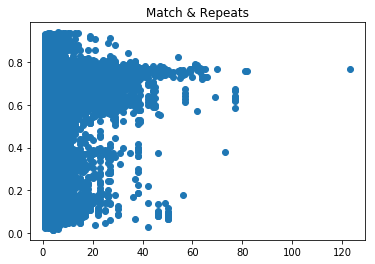

In [30]:
plt.title('Match & Repeats')
plt.plot(bbn['repeats'], bbn['match'], 'o')
plt.show()

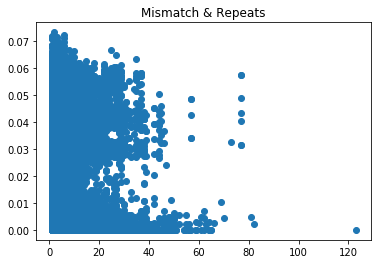

In [31]:
plt.title('Mismatch & Repeats')
plt.plot(bbn['repeats'], bbn['mismatch'], 'o')
plt.show()

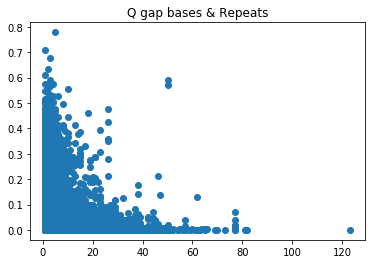

In [32]:
plt.title('Q gap bases & Repeats')
plt.plot(bbn['repeats'], bbn['Q gap bases'], 'o')
plt.show()

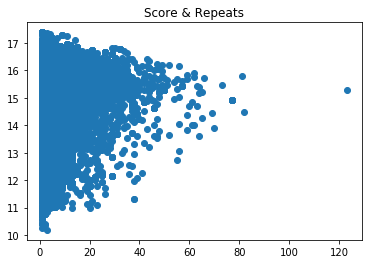

In [33]:
plt.title('Score & Repeats')
plt.plot(bbn['repeats'], bbn['score'], 'o')
plt.show()